<a href="https://colab.research.google.com/github/sohammhatre001/J060-NLP-classwork/blob/master/J060NLP_CMU_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOOKS SUMMARY ANALYSIS

    CMU BOOKS DATASET

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english','german'))
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score
# from nltk import word_tokenize, pos_tag, ne_chunk
from sklearn.model_selection import train_test_split
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
books=pd.read_csv('booksummaries.txt',delimiter='\t',encoding="utf-8")

In [0]:
books.columns=['wikipedia_article_id', 'freebase_id','book_title','author','publication_date','genres','summary'] 

## PRE-PROCESSING

In [0]:
books.drop(['freebase_id','publication_date','author'],axis=1,inplace=True)

In [5]:
books.genres[0]

'{"/m/06n90": "Science Fiction", "/m/0l67h": "Novella", "/m/014dfn": "Speculative fiction", "/m/0c082": "Utopian and dystopian fiction", "/m/06nbt": "Satire", "/m/02xlf": "Fiction"}'

In [6]:
books.head()

,wikipedia_article_id,book_title,genres,summary
0,843,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
1,986,The Plague,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
2,1756,An Enquiry Concerning Human Understanding,NaN,The argument of the Enquiry proceeds by a ser...
3,2080,A Fire Upon the Deep,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
4,2152,All Quiet on the Western Front,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."


In [7]:
books.isna().sum()

wikipedia_article_id       0
book_title                 0
genres                  2561
summary                    0
dtype: int64

In [0]:
books.dropna(inplace=True)

In [0]:
books.reset_index(drop=True,inplace=True)

In [10]:
books.shape

(10962, 4)

In [11]:
for i in range(0,books.shape[0]):
  books['genres'][i]=list((json.loads(books['genres'][i]).values()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
genres=[]
for i in books['genres']:
    genres.append(i)

In [13]:
# get all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

217

Getting a lot of genres

In [0]:
all_genres = nltk.FreqDist(all_genres) 
# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

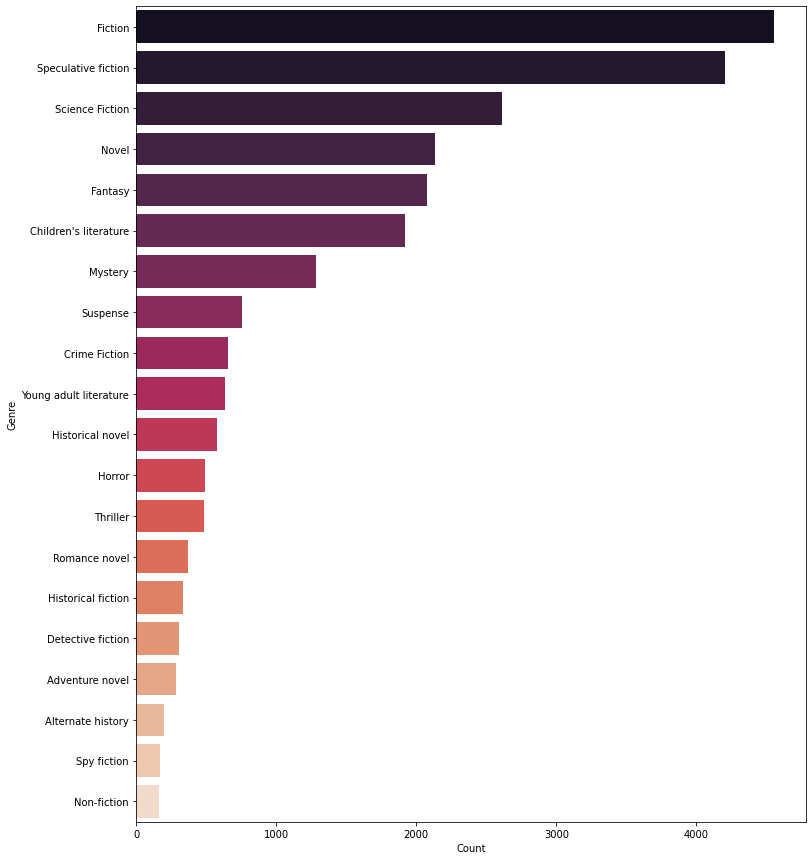

In [15]:
g = all_genres_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre", palette='rocket') 
ax.set(ylabel = 'Genre') 
plt.show()

In [16]:
books.head()

,wikipedia_article_id,book_title,genres,summary
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge..."
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger..."


### LEMMATIZATION

In [0]:
def get_wordnet_pos(word):
  if word.startswith('V'):
    return wordnet.VERB
  elif word.startswith('J'):
    return wordnet.ADJ
  elif word.startswith('N'):
    return wordnet.NOUN
  elif word.startswith('R'):
    return wordnet.ADV      
  else: 
    return wordnet.NOUN

def lemmatize_str(x):
  #Do not use set because it changes the pos_tags
  tokens=word_tokenize(x)
  lemmatizer=WordNetLemmatizer()
  lem_list=[]
  pos_tags=nltk.pos_tag(tokens)
 
  for i in range(0,len(pos_tags)):
    lem_list.append(lemmatizer.lemmatize(pos_tags[i][0],pos=get_wordnet_pos(pos_tags[i][1])))  

  return ' '.join(lem_list)

In [18]:
sentence = "The striped bats are living on their feet for best."
lemmatize_str(sentence)

'The striped bat be live on their foot for best .'

In [0]:
books['lemm_summary']=books['summary'].apply(lemmatize_str)

In [20]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan..."
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger..."
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ..."


### CLEANING TEXT 

    Removing stopwords
    Removing punctuations
    Keeping only alphabets

In [0]:
def clean_text(text):
    # remove backslash-apostrophe and punctuations
    text = re.sub(r'[\[\],.)(\!;:-]',' ',text)
    text = re.sub("\'s", "", text) 
    # # # # convert text to lowercase
    text = text.lower()  
    text=text.split()    
    text= [x for x in text if x.isalpha() and x not in stop_words]
    # # remove whitespaces 
    text = ' '.join(text)   
    return text

In [0]:
books['clean_summary']=books['lemm_summary'].apply(clean_text)

In [23]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary,clean_summary
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan...",alex teenager living near future england lead ...
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...,text plague divide five part town oran thousan...
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...,novel posit space around milky way divide conc...
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger...",book tell story paul bäumer german soldier sch...
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ...",ged young boy gont one large island north arch...


In [24]:
len((books['summary'][0]))

6121

In [25]:
len(books['clean_summary'][1])

4283

# TOPIC MODELLING BASED ON CLEAN AND LEMMATIZED SUMMARY

    Taking top 30 topics and 15 words in each of those 20 topics.
    Using Tf-idf with max_df=0.40 and min_df=0.05 and applying LDA
    on TF-IDF matrix.
    Mapping the topics to the relevant books in the dataframe.
    We have to interpret the topics on our own.

In [0]:
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [0]:
number_topics = 20
number_words = 15
def return_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names()
    t=[]
    for topic_idx, topic in enumerate(model.components_):
        t.append(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return  t

In [28]:
body_vectorizer = TfidfVectorizer(max_df=0.40,min_df=0.05)
body = body_vectorizer.fit_transform(books['clean_summary'])

body_lda = LDA(n_components=number_topics, n_jobs=-1)
body_lda.fit(body)

print("Summary Topics:")
print_topics(body_lda, body_vectorizer, number_words)

Summary Topics:
Topic #0:
john mr mrs investigate law catch red scene american line united real claim appear ask
Topic #1:
book chapter novel character story human describe write also life world people society many include
Topic #2:
miss boy accident money investigate murder search threaten trap kidnap friend wealthy great black area
Topic #3:
ship planet earth human crew war world space force use new captain system kill destroy
Topic #4:
family father mother love life child year become marry young daughter son old live novel
Topic #5:
go tell get house day leave back see come mr say man father boy home
Topic #6:
drug british arrest animal involve sea dream following kidnap american spend high ship murder free
Topic #7:
war new sell old discover army threaten world work young american brother may like drive
Topic #8:
mrs uncle mr london house money old lady cousin marry visit friend young family meet
Topic #9:
novel character life story book childhood main describe york new write ameri

In [0]:
body_topics = return_topics(body_lda, body_vectorizer, number_words)

In [30]:
body_topics[0]

'john mr mrs investigate law catch red scene american line united real claim appear ask'

In [0]:
b_topics = []
for b in body:
    b_topic = body_topics[np.argmax(body_lda.transform(b))]
    b_topics.append(b_topic)

In [0]:
books['summary_topics'] = b_topics

In [33]:
len(books.summary_topics.unique())

20

In [34]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary,clean_summary,summary_topics
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan...",alex teenager living near future england lead ...,murder case police kill death investigate crim...
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...,text plague divide five part town oran thousan...,family father mother love life child year beco...
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...,novel posit space around milky way divide conc...,ship planet earth human crew war world space f...
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger...",book tell story paul bäumer german soldier sch...,go tell get house day leave back see come mr s...
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ...",ged young boy gont one large island north arch...,king kill return escape go magic attack help b...


In [35]:
le=LabelEncoder()
le.fit(books.summary_topics)
list(le.classes_)

['book chapter novel character story human describe write also life world people society many include',
 'boy trip get friend thing think danger story problem happen show cousin little save steal',
 'doctor companion investigate ancient planet village london involve discover arrive face land something stop seem',
 'dog strange hunt story owner ancient mysterious town adventure search involve man friend join set',
 'drug british arrest animal involve sea dream following kidnap american spend high ship murder free',
 'evil must power dark world powerful ancient enemy force battle god army king secret master',
 'family father mother love life child year become marry young daughter son old live novel',
 'game play win story series lady brother young murder team investigate involve pursue crime mysterious',
 'go tell get house day leave back see come mr say man father boy home',
 'john mr mrs investigate law catch red scene american line united real claim appear ask',
 'king kill return esc

In [0]:
books['summary_labels']=le.transform(books.summary_topics)

In [37]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary,clean_summary,summary_topics,summary_labels
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan...",alex teenager living near future england lead ...,murder case police kill death investigate crim...,13
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...,text plague divide five part town oran thousan...,family father mother love life child year beco...,6
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...,novel posit space around milky way divide conc...,ship planet earth human crew war world space f...,18
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger...",book tell story paul bäumer german soldier sch...,go tell get house day leave back see come mr s...,8
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ...",ged young boy gont one large island north arch...,king kill return escape go magic attack help b...,10


In [38]:
books['summary_labels'].value_counts()

10    1896
18    1800
6     1713
8     1572
13    1318
0      675
15     427
17     409
14     382
5      359
16     172
12      83
9       39
2       32
1       24
3       20
11      14
7       13
19      10
4        4
Name: summary_labels, dtype: int64

# GENRE CLASSIFICATION MODEL: MULTI-LABEL CLASSIFICATION

    In the pre-processing part we found that we have 227 unique labels and a  
    single entry can have multiple genres. We are now going to analyse how 
    our summaries are relevant to our genres. 
    I have used the Multi-Label Binarizer which transforms the multiple genres
    in rows with the concept similar to one-hot encoding and then we use 
    Logistic Regression with One vs Rest Classifier after splitting the data 
    into training and validation sets, and then tweaked threshold 
    values of the probabilities model in order to improve the accuracy.

In [0]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(books['genres'])
# transform target variable
y = multilabel_binarizer.transform(books['genres'])

In [0]:
xtrain, xval, ytrain, yval = train_test_split(books['clean_summary'], y, test_size=0.2, random_state=9)
tfidf_vectorizer = TfidfVectorizer(max_df=0.80,max_features=4000)
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

One vs Rest Classifier:

    In an “one-to-rest” strategy, one could build multiple independent 
    classifiers and, for an unseen instance, choose the class for which the 
    confidence is maximized.
    An intuitive approach to solving multi-label problem is to decompose it
    into multiple independent binary classification problems (one per category).

In [41]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 75 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 105 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 108 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 111 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 149 is present in all traini

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
y_pred = clf.predict(xval_tfidf)

In [43]:
# evaluate performance
f1_score(yval, y_pred, average="micro")


0.4301020408163265

In [44]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Fiction',)

In [45]:
multilabel_binarizer.inverse_transform(yval)[3]

("Children's literature",
 'Fantasy',
 'Fiction',
 'Romance novel',
 'Speculative fiction')

In [46]:
multilabel_binarizer.inverse_transform(y_pred)[10]

('Speculative fiction',)

In [47]:
multilabel_binarizer.inverse_transform(yval)[10]

('Science Fiction', 'Speculative fiction')

In [48]:
xval.index[10]

5374

In [51]:
books.iloc[5374,1]

'Grave Matter'

In [0]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [53]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5565184626978146

Accuracy score: 0.52.

    The model is not identifyiing all the classes but gives us a fair idea how
    the summary is related to the genre. 

In [54]:
print(multilabel_binarizer.inverse_transform(y_pred_new)[3])
print(multilabel_binarizer.inverse_transform(yval)[3])

('Fiction', 'Novel', 'Speculative fiction')
("Children's literature", 'Fantasy', 'Fiction', 'Romance novel', 'Speculative fiction')


In [0]:
def infer_tags(q):
    q = lemmatize_str(q)
    q = clean_text(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [68]:
for i in range(5,11): 
  k = xval.index[i] 
  print("Book: ", books['book_title'][k], 
        "\nPredicted genre: ", infer_tags(xval[k])), 
  print("Actual genre: ",books['genres'][k], "\n")

Book:  Shards of Honor 
Predicted genre:  [('Fiction', 'Science Fiction', 'Speculative fiction')]
Actual genre:  ['Science Fiction'] 

Book:  Brisingr 
Predicted genre:  [('Fantasy', 'Speculative fiction')]
Actual genre:  ['Fantasy', 'Speculative fiction', 'Young adult literature', 'High fantasy'] 

Book:  Into Thin Air: A Personal Account of the Mt. Everest Disaster 
Predicted genre:  [()]
Actual genre:  ['Non-fiction'] 

Book:  Pale Gray for Guilt 
Predicted genre:  [('Fiction',)]
Actual genre:  ['Mystery'] 

Book:  Blood Work 
Predicted genre:  [('Crime Fiction', 'Fiction', 'Mystery', 'Suspense')]
Actual genre:  ['Crime Fiction', 'Novel'] 

Book:  Grave Matter 
Predicted genre:  [('Speculative fiction',)]
Actual genre:  ['Science Fiction', 'Speculative fiction'] 



In [0]:
books['predicted_genre']=books['clean_summary'].apply(infer_tags)

In [58]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary,clean_summary,summary_topics,summary_labels,predicted_genre
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan...",alex teenager living near future england lead ...,murder case police kill death investigate crim...,13,"[(Fiction,)]"
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...,text plague divide five part town oran thousan...,family father mother love life child year beco...,6,"[(Fiction,)]"
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...,novel posit space around milky way divide conc...,ship planet earth human crew war world space f...,18,"[(Fiction, Science Fiction, Speculative fiction)]"
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger...",book tell story paul bäumer german soldier sch...,go tell get house day leave back see come mr s...,8,[()]
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ...",ged young boy gont one large island north arch...,king kill return escape go magic attack help b...,10,"[(Children's literature, Fantasy, Speculative ..."


# NAMED ENTITY RECOGNITION

In [59]:
doc = nlp(books['summary'][0]) 

ner=[]
for ent in doc.ents: 
    if ent.label_=='NORP' or ent.label_=='GPE' or ent.label_== 'WORK_OF_ART' or ent.label_== 'ORG':
      print(ent.text, ent.label_)      

England GPE
Anglo-Russian NORP
Nadsat ORG
Lovely Ludwig Van WORK_OF_ART
the Korova Milkbar ORG
A Clockwork Orange WORK_OF_ART
Alex ORG
Wing GPE
Bible WORK_OF_ART
Alex ORG
Billyboy ORG
Alex ORG
Alex ORG
Alex ORG
Alexander ORG
Ludovico GPE
Alex NORP


In [60]:
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})

In [0]:
def get_entities_summary(x):
  doc = nlp(x) 
  ner=[]
  for ent in doc.ents: 
      if ent.label_=='NORP' or ent.label_=='GPE' or ent.label_== 'WORK_OF_ART' or ent.label_== 'ORG':
        ner.append(ent.text)
  return list(set(ner))

In [62]:
get_entities_summary(books['summary'][0])

['Alex',
 'England',
 'Bible',
 'Anglo-Russian',
 'Billyboy',
 'Alexander',
 'Nadsat',
 'A Clockwork Orange',
 'the Korova Milkbar',
 'Lovely Ludwig Van',
 'Wing',
 'Ludovico']

In [0]:
books['entities']=books['summary'].apply(get_entities_summary)

In [64]:
books.head()

,wikipedia_article_id,book_title,genres,summary,lemm_summary,clean_summary,summary_topics,summary_labels,predicted_genre,entities
0,843,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...","Alex , a teenager living in near-future Englan...",alex teenager living near future england lead ...,murder case police kill death investigate crim...,13,"[(Fiction,)]","[Alex, England, Bible, Anglo-Russian, Billyboy..."
1,986,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,The text of The Plague be divide into five par...,text plague divide five part town oran thousan...,family father mother love life child year beco...,6,"[(Fiction,)]","[Othon, Paris, Christian, Orpheus and Eurydice..."
2,2080,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...,The novel posit that space around the Milky Wa...,novel posit space around milky way divide conc...,ship planet earth human crew war world space f...,18,"[(Fiction, Science Fiction, Speculative fiction)]","[Slow Zone, Transcend, FTL, the Out of Band II..."
3,2152,All Quiet on the Western Front,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...","The book tell the story of Paul Bäumer , a Ger...",book tell story paul bäumer german soldier sch...,go tell get house day leave back see come mr s...,8,[()],"[German, the German Army, Paris, the Western F..."
4,2890,A Wizard of Earthsea,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...","Ged be a young boy on Gont , one of the large ...",ged young boy gont one large island north arch...,king kill return escape go magic attack help b...,10,"[(Children's literature, Fantasy, Speculative ...","[the ""Nameless Ones"", Osskil, Ogion's, Ged, If..."


# RECOMMENDING BOOKS BASED ON INTERPRETATION OF TOPICS

In [65]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

array(['book chapter novel character story human describe write also life world people society many include',
       'boy trip get friend thing think danger story problem happen show cousin little save steal',
       'doctor companion investigate ancient planet village london involve discover arrive face land something stop seem',
       'dog strange hunt story owner ancient mysterious town adventure search involve man friend join set',
       'drug british arrest animal involve sea dream following kidnap american spend high ship murder free',
       'evil must power dark world powerful ancient enemy force battle god army king secret master',
       'family father mother love life child year become marry young daughter son old live novel',
       'game play win story series lady brother young murder team investigate involve pursue crime mysterious',
       'go tell get house day leave back see come mr say man father boy home',
       'john mr mrs investigate law catch red scene america

Topics:  

0.   Books about Society,War and People 
1.   Books which have a series
2.   Books about friendship and childhood
3.   Adventure Books (Ancient and future both)
4.   War Fiction (Gods and Evils)
5.   Childhood Literature
6.   Crime Stories and Woman's Books
7.   Love Stories and Books Based on UK
8.   Family and Relationship books
9.   Games,Fiction
10.  Fantasy,Ficiton
11.  Mystery
12.  Kings,Queens,Mystery,Armies
13.  Mystery and Fantasy
14.  Child Fiction and Based on School
15.  Crime
16.  Novels with Protagonists, Love and AMerica
17.  Adventure,Travel,Space,Ficiton
18.  Mystery,Adventure,Action,Crime
19.  Prison, Childhood, Books based on towns and villages  
  

I am using the topic labels and giving out entities to understand what the book is about. It gives the reader some context. Well the topics keep on changing.

In [0]:
def get_books_entities(category):
  return books.loc[(books.summary_labels == category),['book_title','entities','summary_topics']].reset_index(drop=True)           

In [105]:
get_books_entities(15)

,book_title,entities,summary_topics
0,Icehenge,"[Pluto, Martian, Icehenge]",novel concern story adventure character war bo...
1,Castle Rackrent,[],novel concern story adventure character war bo...
2,The Number of the Beast,"[Edgar Rice Burroughs, Dejah Thoris, Barsoom, ...",novel concern story adventure character war bo...
3,"England, England","[England, Old England', English, agrarian, Ang...",novel concern story adventure character war bo...
4,Memoirs of a Fox-Hunting Man,"[Sassoon, Sherson/Sassoon's, Faber, The Flower...",novel concern story adventure character war bo...
...,...,...,...
422,Le Chercheur d'or,[Mauritius],novel concern story adventure character war bo...
423,Ourania,"[Ourania, Utopian, Mexico, Salvadoran, Valle d...",novel concern story adventure character war bo...
424,City of the Spider Queen,"[Creature Statistics, The Deep Wastes, Appendi...",novel concern story adventure character war bo...
425,Babylon Babies,"[Quebec, The Red Siren]",novel concern story adventure character war bo...


In [106]:
get_books_entities(10)

,book_title,entities,summary_topics
0,A Wizard of Earthsea,"[the ""Nameless Ones"", Osskil, Ogion's, Ged, If...",king kill return escape go magic attack help b...
1,Blade Runner 2: The Edge of Human,"[Do Androids Dream Of Electric Sheep?, Deckard...",king kill return escape go magic attack help b...
2,Children of Dune,"[House, The Imperial high council, Dune, Freme...",king kill return escape go magic attack help b...
3,"Candide, ou l'Optimisme","[Castle Thunder, Egypt, Bulgars, Cunégonde, We...",king kill return escape go magic attack help b...
4,Dracula,"[Bowie, England, Exeter, Russian, American, Lo...",king kill return escape go magic attack help b...
...,...,...,...
1891,Seekers of the Sky,"[Bishop Gerard, the Count of the Isles of Sorr...",king kill return escape go magic attack help b...
1892,We Couldn't Leave Dinah,"[German, English, The Pony Club's, the Pony Cl...",king kill return escape go magic attack help b...
1893,One Corpse Too Many,"[Frankwell, Godith, Beringar, Fulke Adeney, Em...",king kill return escape go magic attack help b...
1894,Karmabhoomi,"[Gandhian, Untouchables, Amarkant, Hindu, Sukh...",king kill return escape go magic attack help b...
